HI, I am **Gautam kumar Jaiswal**. I am a student of IT in HMRITM, Delhi. This is My **Internship project** as a **Data Science & Bussiness Analytics Intern** at **The Spark Foundation**.

# Prediction using Supervised ML (Level -Beginner)
1. Predict the percentage of an student based on the no. of study hours.
2. This is a simple linear regression task as it involves just 2 variables.
3. Used Scikit-Learn, Python programming language, and other packages.

In [2]:
# import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing and Preparing Data
Import data, Prepare and Try some mathmatical formule

In [3]:
data = pd.read_csv("student_score.csv")     # import student_score.csv data file
data     #visualize the data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.info()     # description of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()     # describe the mathmatical function of data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Visualize the Data with Matplotlib package
Plotted the data with scatter plot.

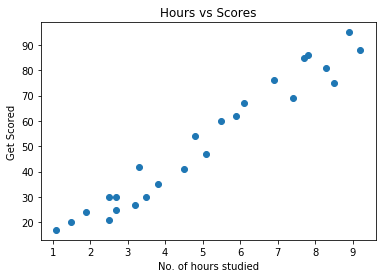

In [6]:
plt.scatter(x=data['Hours'], y=data["Scores"])
plt.title("Hours vs Scores")
plt.xlabel("No. of hours studied")
plt.ylabel("Get Scored")
plt.show()

In [18]:
features = data.iloc[:, :-1].values
labels = data.iloc[:, 1].values
features

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

## Training of Scikit-learn Linear Regression Model
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [8]:
# Splitting into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    labels,
                                                    test_size=0.2,
                                                   random_state=0)

In [9]:
# Training the model
from sklearn.linear_model import LinearRegression
lg = LinearRegression(n_jobs=10)
lg.fit(x_train, y_train)
train_pred = lg.score(x_train, y_train)
test_pred = lg.score(x_test, y_test)

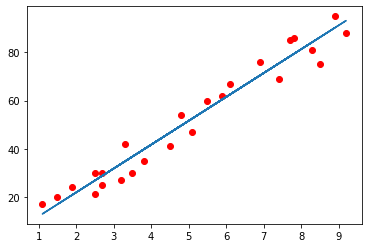

In [10]:
# Regression coefficent between train and test data.
factor = lg.coef_ * features + lg.intercept_
plt.scatter(features, labels, color="red")
plt.plot(features, factor)      # plotting the features and labels
plt.show()       # visulaizing

In [11]:
print(x_test) # Testing data - In Hours
y_pred = lg.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
# Difference between Actual Data and Own Predicted Data
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


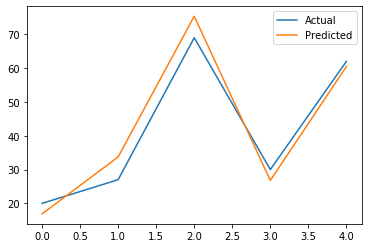

In [13]:
# Final visualization 
df.plot(kind="line")
plt.show()

### What will be predicted score if a student studies for 9.25 hrs/ day?

In [35]:
hours = np.array(9.25).reshape(1, -1)
pred = lg.predict(hours)
print("If Student studies for", int(hours), "hrs/day will score", int(pred[0]), ".")

If Student studies for 9 hrs/day will score 93 .


## Perform Mean Absolute Error in model

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 